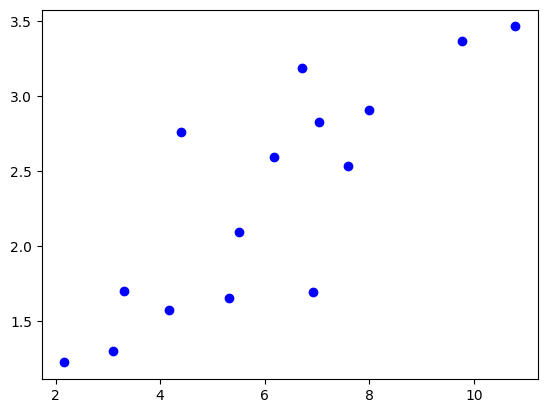

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
torch.manual_seed(43)
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
[9.779], [6.182], [7.59], [2.167], [7.042],
[10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
[3.366], [2.596], [2.53], [1.221], [2.827],
[3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_train, y_train, 'bo')

In [2]:
w = Variable(torch.randn(1), requires_grad=True)  # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True)  # 使⽤ 0 进⾏初始化
# 定义学习率a
# a = 0.002
a = 0.2
# 构建⼀元线性回归模型
def linear_model(x):
    return x * w + b
# 输⼊数据转换成 Tensor 再转换为Variable
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = Variable(x_train)
y_train = Variable(y_train)
# 构建线性回归模型
y_ = linear_model(x_train)

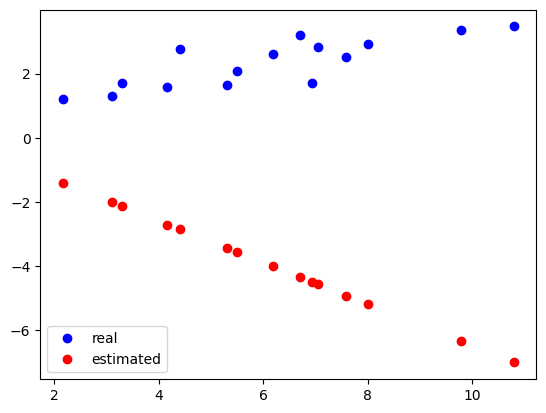

In [3]:

plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [4]:
#   误差函数
def get_loss(y_, y_train):
    return torch.mean((y_ - y_train) ** 2)
loss = get_loss(y_, y_train)
print(loss)

tensor(43.8924, grad_fn=<MeanBackward0>)


In [5]:
#  计算 w 和 b的梯度
loss.backward()
# 查看 w 和 b 的梯度
print(w.grad)
print(b.grad)

tensor([-85.9665])
tensor([-12.5134])


In [6]:
# 更新⼀次参数
w.data = w.data - a * w.grad.data
b.data = b.data - a * b.grad.data

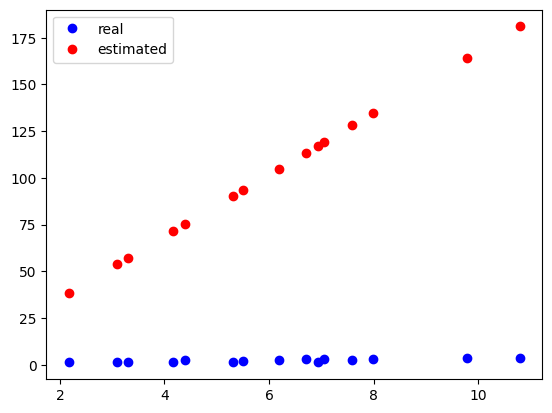

In [7]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [8]:
# 进⾏30 次参数更新
for e in range(30):
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    w.data = w.data - a * w.grad.data # 更新 w
    b.data = b.data - a * b.grad.data # 更新 b
    print('epoch: {}, loss: {}'.format(e, loss.item()))

epoch: 0, loss: 11574.8076171875
epoch: 1, loss: 3067416.75
epoch: 2, loss: 812904640.0
epoch: 3, loss: 215430152192.0
epoch: 4, loss: 57091741974528.0
epoch: 5, loss: 1.5130039133667328e+16
epoch: 6, loss: 4.0096552985863127e+18
epoch: 7, loss: 1.0626099064855121e+21
epoch: 8, loss: 2.8160522081187955e+23
epoch: 9, loss: 7.462900559819879e+25
epoch: 10, loss: 1.9777637994252117e+28
epoch: 11, loss: 5.241328114084715e+30
epoch: 12, loss: 1.3890188606497877e+33
epoch: 13, loss: 3.681077495133871e+35
epoch: 14, loss: inf
epoch: 15, loss: inf
epoch: 16, loss: inf
epoch: 17, loss: inf
epoch: 18, loss: inf
epoch: 19, loss: inf
epoch: 20, loss: inf
epoch: 21, loss: inf
epoch: 22, loss: inf
epoch: 23, loss: inf
epoch: 24, loss: inf
epoch: 25, loss: inf
epoch: 26, loss: inf
epoch: 27, loss: inf
epoch: 28, loss: inf
epoch: 29, loss: inf


学习率： 0.2


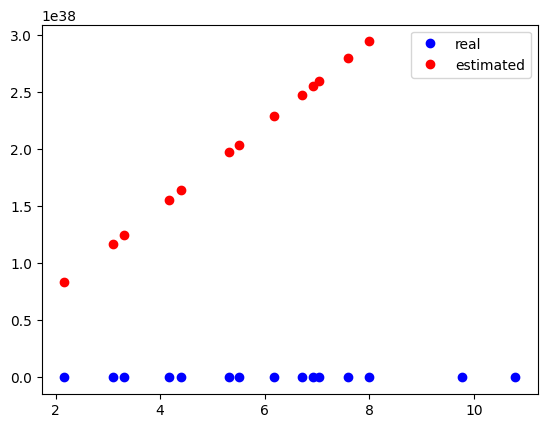

In [9]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
print("学习率：", a)
plt.legend()